# Questions pour anova 1
1)Y a-t-il une différence significative de la satisfaction des passagers en fonction du genre ?

2)Existe-t-il une variation significative de la satisfaction des passagers en fonction du type de client (client fidèle ou client déloyal) ?

3)La satisfaction des passagers varie-t-elle en fonction du type de voyage (voyage d'affaires ou de loisirs) ? Y a-t-il une différence significative de la satisfaction des passagers en fonction de la classe de vol (économique ou affaires) ?

4)Existe-t-il une variation significative de la satisfaction des passagers en fonction de la compagnie aérienne (peut-être à partir de l'ID) ?

# Prétraitement

In [ ]:
# Importer les bibliothèques nécessaires
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [ ]:
data = pd.read_csv("test.csv")
data.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


In [ ]:
# Vérifier les valeurs manquantes
data.isnull().sum()
#On a trouver 83 valeurs manquantes dans la colonne "Arrival Delay in Minutes".

Unnamed: 0                            0
id                                    0
Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             83
satisfaction                          0


In [ ]:
#O an choisir de remplir les valeurs manquantes avec la moyenne du colonne "Arrival Delay in Minutes".
mean_arrival_delay = data['Arrival Delay in Minutes'].mean()
data['Arrival Delay in Minutes'].fillna(mean_arrival_delay, inplace=True)
# 0 valeurs manquantes
data.isnull().sum()

Unnamed: 0                           0
id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

In [ ]:
data.drop("Unnamed: 0", axis=1, inplace=True)
#data.drop(columns=['id'], inplace=True)

In [ ]:
data1 = data
data1.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,...,2,2,2,2,4,2,4,0,20.0,satisfied


In [ ]:
#tronsformations des variables quantitatifs à des valeurs  booléens
#data['satisfaction'] = data['satisfaction'].map({'satisfied': 1, 'neutral or dissatisfied': 0})
data['Gender'] = data['Gender'].map({'Female': 1, 'Male': 0})
data['Class'] = data['Class'].map({'Eco': 1, 'Business': 0})
data['Customer Type'] = data['Customer Type'].map({'Loyal Customer': 1, 'disloyal Customer': 0})
data['Type of Travel'] = data['Type of Travel'].map({'Business travel': 1, 'Personal Travel': 0})


In [ ]:
anova_satis = smf.ols('Gender~satisfaction', data=data).fit()
sm.stats.anova_lm(anova_satis)

,df,sum_sq,mean_sq,F,PR(>F)
satisfaction,1.0,0.349321,0.349321,1.397534,0.237148
Residual,25974.0,6492.347322,0.249956,NaN,NaN


In [ ]:
data.rename(columns={'Customer Type': 'Customer_Type'}, inplace=True)
anova_satis = smf.ols('Customer_Type~satisfaction', data=data).fit()
sm.stats.anova_lm(anova_satis)

,df,sum_sq,mean_sq,F,PR(>F)
satisfaction,1.0,126.243718,126.243718,866.064875,2.776765e-187
Residual,25974.0,3786.153226,0.145767,NaN,NaN


il existe une variation significative de la satisfaction des passagers en fonction du type de client (client fidèle ou client déloyal)

In [ ]:
data.rename(columns={'Type of Travel': 'Type_of_Travel'}, inplace=True)
anova_satis = smf.ols('Type_of_Travel~satisfaction', data=data).fit()
sm.stats.anova_lm(anova_satis)

,df,sum_sq,mean_sq,F,PR(>F)
satisfaction,1.0,1132.499973,1132.499973,6716.296461,0.0
Residual,25974.0,4379.728392,0.168620,NaN,NaN


il y a une différence significative de la satisfaction des passagers en fonction de type de voyage (économique ou affaires).

In [ ]:
anova_satis = smf.ols('id~satisfaction', data=data).fit()
sm.stats.anova_lm(anova_satis)

,df,sum_sq,mean_sq,F,PR(>F)
satisfaction,1.0,4.418009e+09,4.418009e+09,3.123346,0.07719
Residual,25974.0,3.674052e+13,1.414511e+09,NaN,NaN


il n'y a pas de variation significative de la satisfaction des passagers en fonction de la compagnie aérienne

In [ ]:
anova_satis = smf.ols('Class~satisfaction', data=data).fit()
sm.stats.anova_lm(anova_satis)

,df,sum_sq,mean_sq,F,PR(>F)
satisfaction,1.0,1519.617442,1519.617442,8148.999226,0.0
Residual,24057.0,4486.125939,0.186479,NaN,NaN


il y a une différence significative de la satisfaction des passagers en fonction de la classe de vol (économique ou affaires).

# Questions pour anova 2
1)Existe-t-il une interaction significative entre le genre et le type de client (fidèle ou déloyal) sur la satisfaction des passagers ?



2)Y a-t-il une interaction significative entre le type de voyage (affaires ou loisirs) et la classe de vol (économique ou affaires) sur la satisfaction des passagers ?






3)Existe-t-il une interaction significative entre le type de client et la classe de vol sur la satisfaction des passagers ?

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
# Convertir la variable 'satisfaction' en type catégorique
data['satisfaction'] = data['satisfaction'].astype('category')

# Créer le modèle avec l'interaction entre 'Customer_Type' et 'Class'
model = ols('satisfaction ~ Customer_Type * Class', data=data).fit()

# Effectuer l'ANOVA
anova_results = sm.stats.anova_lm(model)
print(anova_results)

ValueError: endog has evaluated to an array with multiple columns that has shape (24059, 2). This occurs when the variable converted to endog is non-numeric (e.g., bool or str).

In [ ]:
anova_variete_phyto = smf.ols('satisfaction ~ Customer_Type * Class', data=data).fit()
sm.stats.anova_lm(anova_variete_phyto)

,df,sum_sq,mean_sq,F,PR(>F)
Customer_Type,1.0,70.879874,70.879874,383.689863,8.965122e-85
satisfaction,1.0,1449.749731,1449.749731,7847.845106,0.000000e+00
Customer_Type:satisfaction,1.0,41.380582,41.380582,224.003077,2.043318e-50
Residual,24055.0,4443.733193,0.184732,NaN,NaN


In [ ]:
anova_variete_phyto = smf.ols('Customer_Type *Gender ~ satisfaction ', data=data).fit()
sm.stats.anova_lm(anova_variete_phyto)

ValueError: endog has evaluated to an array with multiple columns that has shape (25976, 3). This occurs when the variable converted to endog is non-numeric (e.g., bool or str).

In [ ]:
anova_variete_phyto = smf.ols('satisfaction ~Type_of_Travel * Class', data=data).fit()
sm.stats.anova_lm(anova_variete_phyto)

# Questions pour l'ACP :
1)Quels sont les principaux facteurs qui contribuent à la variation dans la satisfaction des passagers ?

2)Existe-t-il des regroupements de caractéristiques de vol qui sont fortement corrélées entre elles ?

3)Pouvez-vous réduire la dimensionnalité de ces données pour visualiser les passagers de manière plus concise tout en préservant autant de variance que possible ?

4)Quelles sont les caractéristiques qui ont le plus d'impact sur la satisfaction globale des passagers ?

5)Y a-t-il des tendances ou des motifs identifiables dans les données qui pourraient être associés à la satisfaction des passagers ?

In [ ]:
print(data.describe())

                  id        Gender  Customer_Type           Age  \
count   25976.000000  25976.000000   25976.000000  25976.000000   
mean    65005.657992      0.507083       0.815253     39.620958   
std     37611.526647      0.499959       0.388100     15.135685   
min        17.000000      0.000000       0.000000      7.000000   
25%     32170.500000      0.000000       1.000000     27.000000   
50%     65319.500000      1.000000       1.000000     40.000000   
75%     97584.250000      1.000000       1.000000     51.000000   
max    129877.000000      1.000000       1.000000     85.000000   

       Type_of_Travel         Class  Flight Distance  Inflight wifi service  \
count    25976.000000  24059.000000     25976.000000           25976.000000   
mean         0.694410      0.480652      1193.788459               2.724746   
std          0.460666      0.499636       998.683999               1.335384   
min          0.000000      0.000000        31.000000               0.000000   
2

In [ ]:
data['satisfaction'] = data['satisfaction'].map({'satisfied': 1, 'neutral or dissatisfied': 0})
corr_matrix = data.corr()

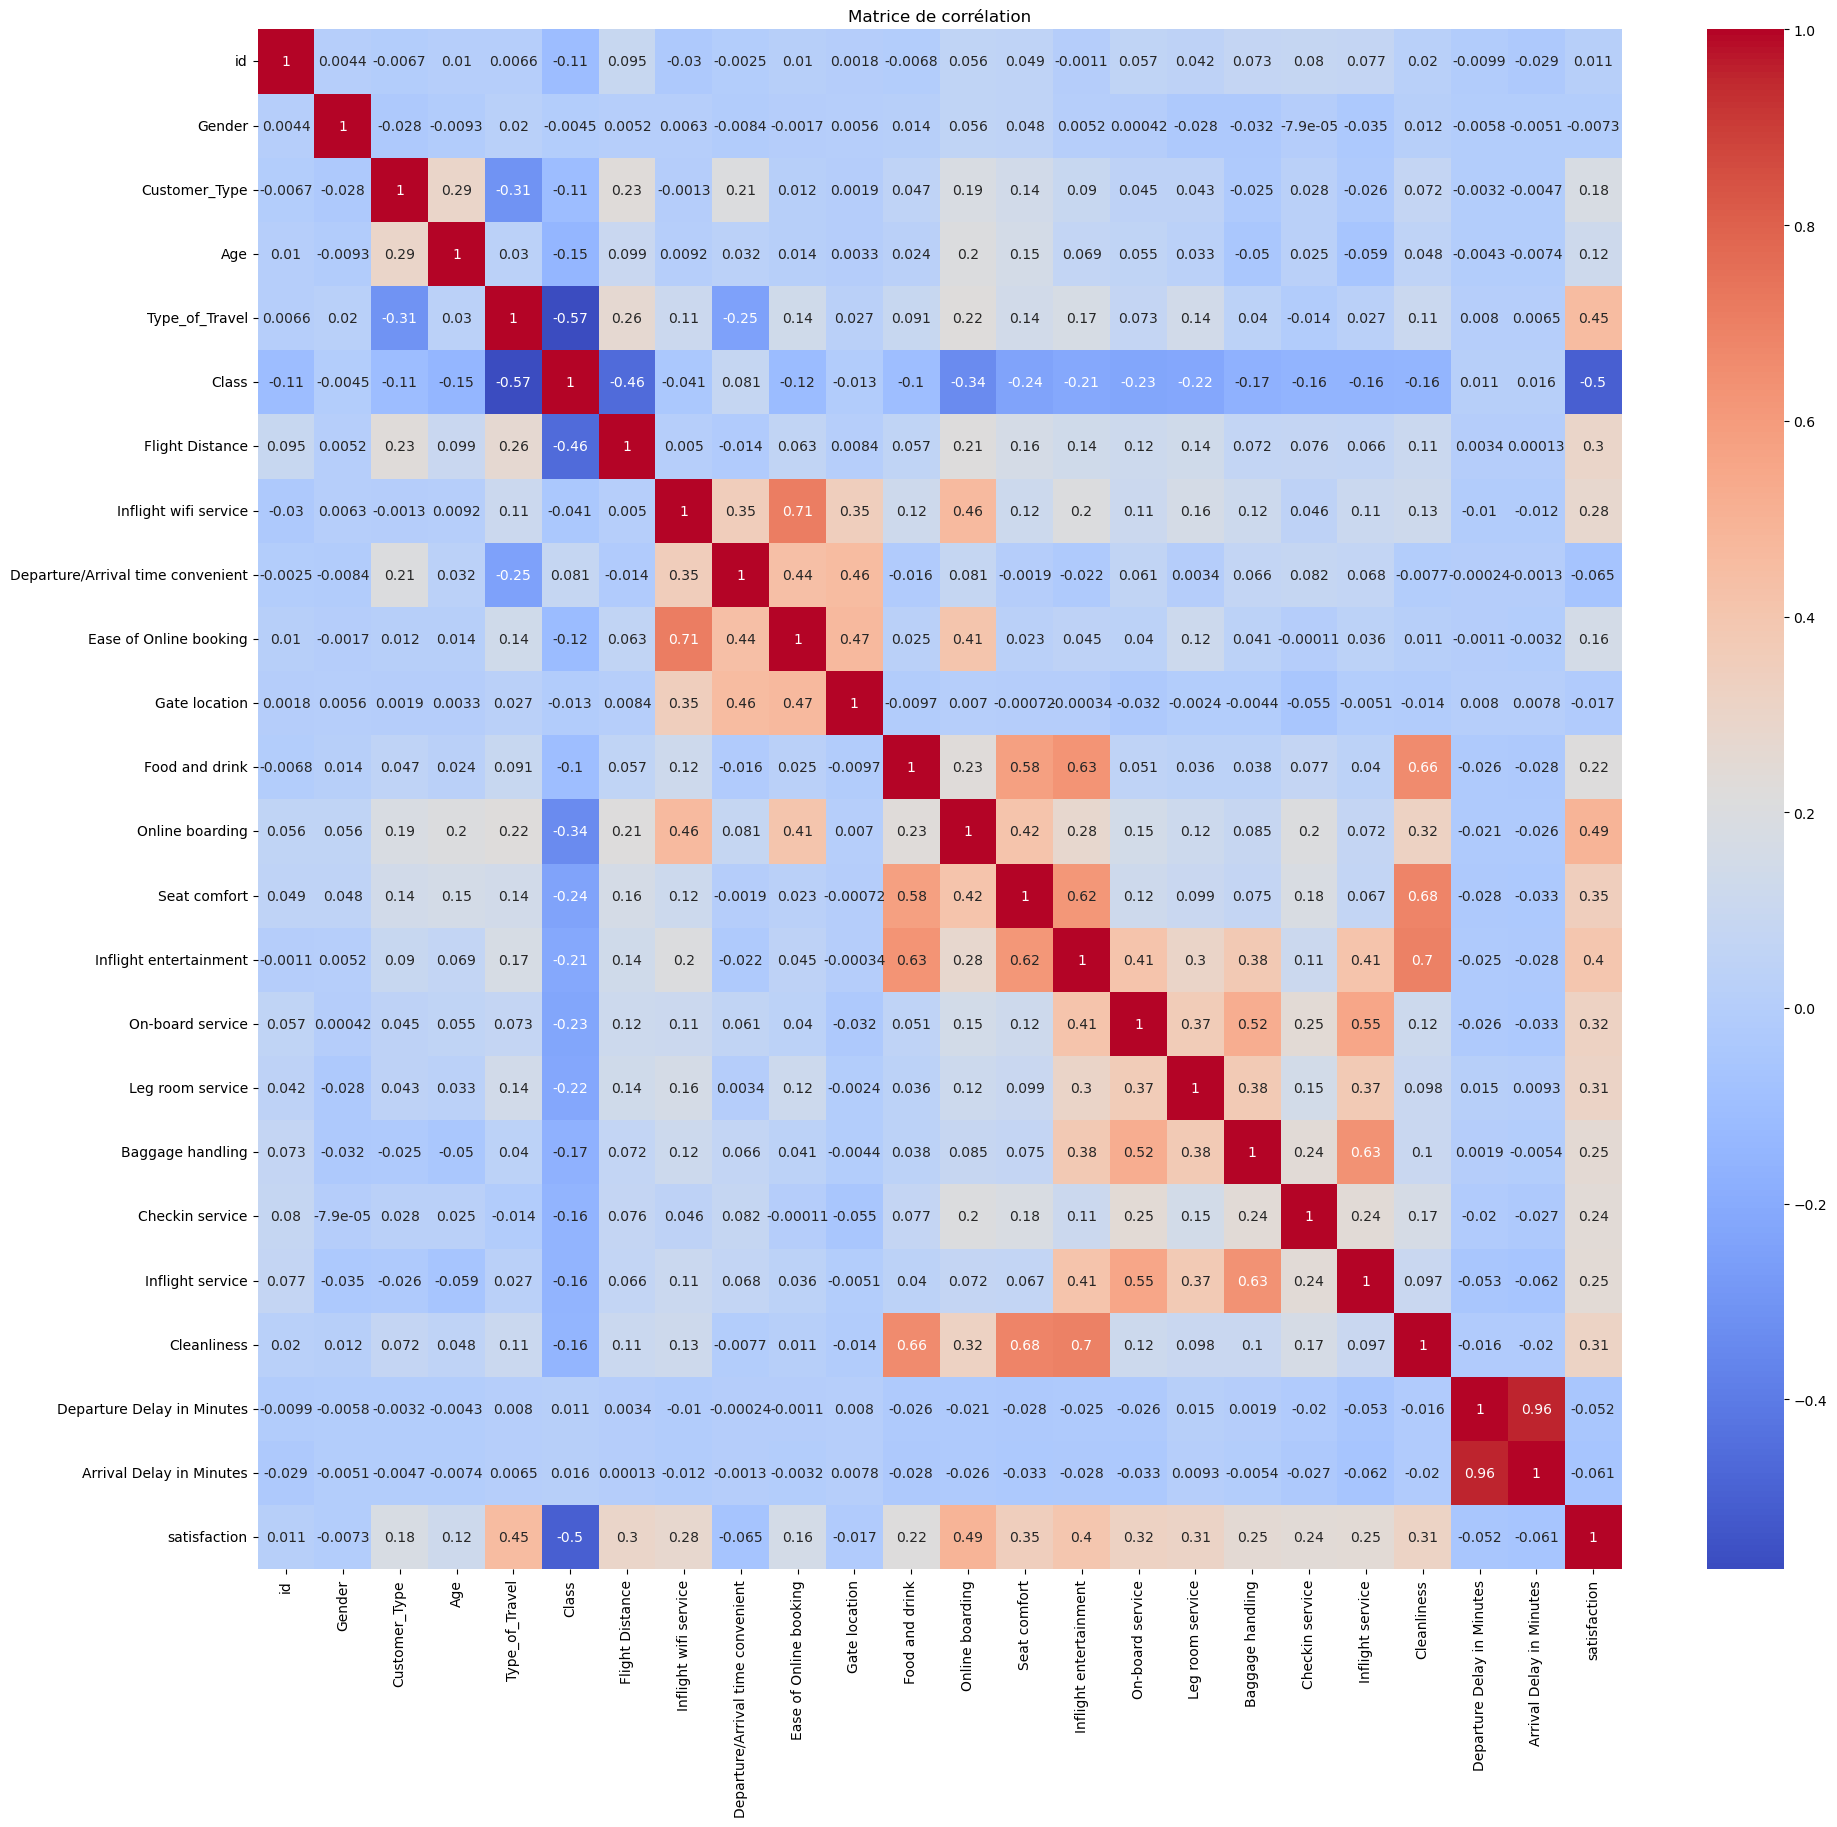

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(22, 20))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Matrice de corrélation")
plt.show()

In [ ]:
data.rename(columns={'Flight Distance': 'FD'}, inplace=True)
data.rename(columns={'Inflight wifi service': 'Wifi'}, inplace=True)
data.rename(columns={'Ease of Online booking': 'EOB'}, inplace=True)
data.rename(columns={'Food and drink': 'F&D'}, inplace=True)
data.rename(columns={'Online boarding': 'OB'}, inplace=True)
data.rename(columns={'Seat comfort': 'SC'}, inplace=True)
data.rename(columns={'Inflight entertainment': 'IE'}, inplace=True)
data.rename(columns={'On-board service': 'OBS'}, inplace=True)
data.rename(columns={'Leg room service': 'LRS'}, inplace=True)
data.rename(columns={'Baggage handling': 'BH'}, inplace=True)
data.rename(columns={'Inflight service': 'IS'}, inplace=True)
data.rename(columns={'Checkin service': 'CS'}, inplace=True)
data_acp = ['FD', 'Wifi', 'EOB','F&D','OB','SC','IE','OBS','LRS','BH','CS','IS','Cleanliness']

In [ ]:
#data_acp = pd.get_dummies(data_acp)

In [ ]:
data[data_acp].head()

,FD,Wifi,EOB,F&D,OB,SC,IE,OBS,LRS,BH,CS,IS,Cleanliness
0,160,5,3,3,4,3,5,5,5,5,2,5,5
1,2863,1,3,5,4,5,4,4,4,4,3,4,5
2,192,2,2,2,2,2,2,4,1,3,2,2,2
3,3377,0,0,3,4,4,1,1,1,1,3,1,4
4,1182,2,4,4,1,2,2,2,2,2,4,2,4


In [ ]:
from sklearn.preprocessing import StandardScaler
#instanciation
sc = StandardScaler()
#transformation – centrage-réduction
Z = sc.fit_transform(data[data_acp])
#classe pour standardisation
#Matrice de nuage

array([[<Axes: xlabel='FD', ylabel='FD'>,
        <Axes: xlabel='Wifi', ylabel='FD'>,
        <Axes: xlabel='EOB', ylabel='FD'>,
        <Axes: xlabel='F&D', ylabel='FD'>,
        <Axes: xlabel='OB', ylabel='FD'>,
        <Axes: xlabel='SC', ylabel='FD'>,
        <Axes: xlabel='IE', ylabel='FD'>,
        <Axes: xlabel='OBS', ylabel='FD'>,
        <Axes: xlabel='LRS', ylabel='FD'>,
        <Axes: xlabel='BH', ylabel='FD'>,
        <Axes: xlabel='CS', ylabel='FD'>,
        <Axes: xlabel='IS', ylabel='FD'>,
        <Axes: xlabel='Cleanliness', ylabel='FD'>],
       [<Axes: xlabel='FD', ylabel='Wifi'>,
        <Axes: xlabel='Wifi', ylabel='Wifi'>,
        <Axes: xlabel='EOB', ylabel='Wifi'>,
        <Axes: xlabel='F&D', ylabel='Wifi'>,
        <Axes: xlabel='OB', ylabel='Wifi'>,
        <Axes: xlabel='SC', ylabel='Wifi'>,
        <Axes: xlabel='IE', ylabel='Wifi'>,
        <Axes: xlabel='OBS', ylabel='Wifi'>,
        <Axes: xlabel='LRS', ylabel='Wifi'>,
        <Axes: xlabel='BH', ylabel='

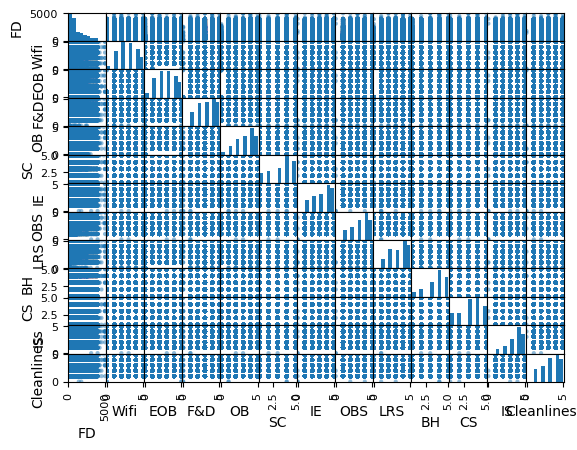

In [ ]:
from sklearn.preprocessing import StandardScaler
#instanciation
sc = StandardScaler()
#transformation – centrage-réduction
Z = sc.fit_transform(data[data_acp])
#classe pour standardisation
#Matrice de nuage
pd.plotting.scatter_matrix(data[data_acp])

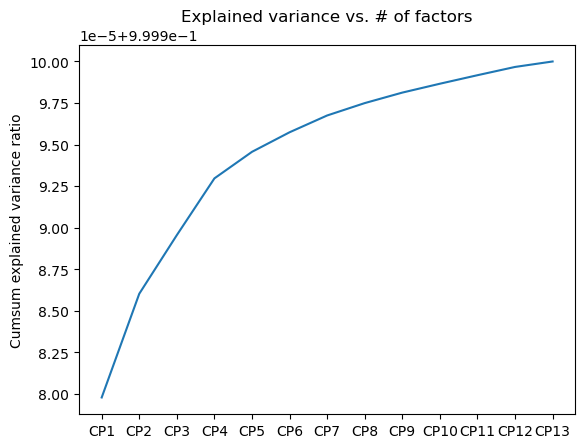

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'data' is your dataset with NaN values
# Impute NaN values with the mean of each feature
imputer = SimpleImputer(strategy='mean')
data_imputed = imputer.fit_transform(data[data_acp])

# Fit PCA on the imputed data
pca = PCA()
pca.fit(data_imputed)

# Plotting cumulative explained variance ratio
list_acp = ["CP1", "CP2", "CP3", "CP4", "CP5", "CP6", "CP7", "CP8", "CP9", "CP10","CP11", "CP12", "CP13"]
plt.plot(list_acp, np.cumsum(pca.explained_variance_ratio_))
plt.title("Explained variance vs. # of factors")
plt.ylabel("Cumsum explained variance ratio")
plt.show()

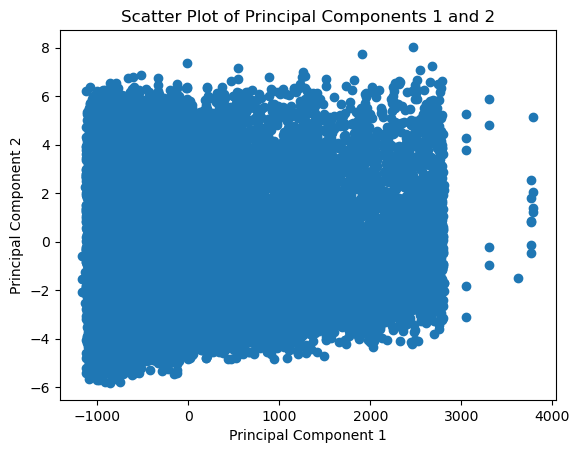

In [ ]:
# Transform the data into the principal component space
coord = pca.transform(data_imputed)

# Plotting scatter plot
plt.scatter(coord[:, 0], coord[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Scatter Plot of Principal Components 1 and 2')
plt.show()

In [ ]:
import pandas as pd
import numpy as np

# Assuming 'data' is your DataFrame
# Assuming 'ctr' is your array
# Assuming 'data.index' contains identifiers for each row

# Generate example data for demonstration
data_index = range(10)  # Example index
ctr = np.random.rand(10, 8)  # Example random data

# Normalize ctr values by column
for j in range(8):
    ctr[:, j] = ctr[:, j] / np.sum(ctr[:, j])

# Create DataFrame with normalized ctr values
# Assuming 'data_index' is the correct index for your DataFrame
T_ctr_cp1cp2 = pd.DataFrame({'id': data_index, 'CTR_1': ctr[:, 0], 'CTR_2': ctr[:, 1]})
T_ctr_cp1cp2

,id,CTR_1,CTR_2
0,0,0.138826,0.047138
1,1,0.005428,0.198146
2,2,0.121392,0.128551
3,3,0.146900,0.003636
4,4,0.159144,0.057964
5,5,0.104503,0.119732
6,6,0.072249,0.050997
7,7,0.128795,0.107770
8,8,0.050373,0.144643
9,9,0.072389,0.141422


In [ ]:
import pandas as pd
import numpy as np

# Assuming 'data' is your DataFrame
# Assuming 'cos2' is your array
# Assuming 'data.index' contains identifiers for each row

# Generate example data for demonstration
data_index = range(10)  # Example index
cos2 = np.random.rand(10, 8)  # Example random data

# Normalize cos2 values by column
di = np.sum(cos2, axis=0)
for j in range(8):
    cos2[:, j] = cos2[:, j] / di[j]

# Create DataFrame with normalized cos2 values
# Assuming 'data_index' is the correct index for your DataFrame
T_ctr_12 = pd.DataFrame({'id': data_index, 'COS2_1': cos2[:, 0], 'COS2_2': cos2[:, 1]})
T_ctr_12


,id,COS2_1,COS2_2
0,0,0.074827,0.041958
1,1,0.126608,0.090846
2,2,0.148176,0.038505
3,3,0.024861,0.050684
4,4,0.099693,0.169375
5,5,0.173591,0.145895
6,6,0.051383,0.163888
7,7,0.160462,0.034228
8,8,0.064667,0.110160
9,9,0.075732,0.154461


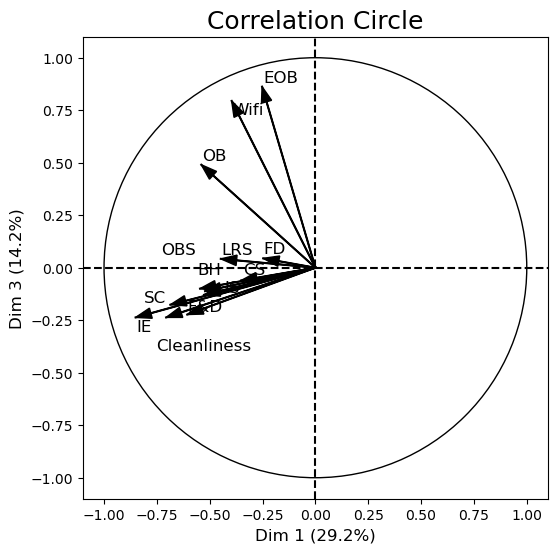

In [ ]:
from mlxtend.plotting import plot_pca_correlation_graph
figure, correlation_matrix = plot_pca_correlation_graph(Z,
                                                        data[data_acp].columns.values,
                                                        dimensions=(1,3),
                                                        figure_axis_size=6)

# Classification

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Sélection des caractéristiques pertinentes
# Séparation des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(data[data_acp], data['satisfaction'], test_size=0.2, random_state=42)

# Instanciation du classificateur (par exemple, un classificateur de forêt aléatoire)
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Entraînement du modèle
clf.fit(X_train, y_train)

# Prédiction sur l'ensemble de test
y_pred = clf.predict(X_test)

# Évaluation des performances du modèle
accuracy = accuracy_score(y_test, y_pred)
print("Précision du modèle :", accuracy)


Précision du modèle : 0.9226327944572749


Une précision de 92,26 % est assez élevée, ce qui suggère que le modèle de classification (dans ce cas, un classificateur de forêt aléatoire) a bien performé dans la prédiction de la satisfaction des passagers en fonction des caractéristiques sélectionnées. Cependant, il est toujours bon de vérifier d'autres métriques de performance telles que le rappel, la précision, le score F1, etc., pour obtenir une image plus complète de la performance du modèle. De plus, il est important de considérer d'autres aspects comme le déséquilibre de classe, la robustesse du modèle, et la capacité à généraliser sur de nouvelles données.

In [ ]:
from sklearn.cluster import KMeans

# Instanciation du modèle K-means
kmeans = KMeans(n_clusters=2)

# Entraînement du modèle
kmeans.fit(data)

# Prédiction des clusters pour chaque observation
clusters_kmeans = kmeans.predict(data)


ValueError: Input X contains NaN.
KMeans does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
from sklearn.cluster import AgglomerativeClustering

# Instanciation du modèle de classification hiérarchique
hierarchique = AgglomerativeClustering(n_clusters=2, linkage='ward')

# Prédiction des clusters pour chaque observation
clusters_hierarchique = hierarchique.fit_predict(data_acp)


ValueError: Expected 2D array, got 1D array instead:
array=['FD' 'Wifi' 'EOB' 'F&D' 'OB' 'SC' 'IE' 'OBS' 'LRS' 'BH' 'CS' 'IS'
 'Cleanliness'].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
data[data_acp]

,FD,Wifi,EOB,F&D,OB,SC,IE,OBS,LRS,BH,CS,IS,Cleanliness
0,160,5,3,3,4,3,5,5,5,5,2,5,5
1,2863,1,3,5,4,5,4,4,4,4,3,4,5
2,192,2,2,2,2,2,2,4,1,3,2,2,2
3,3377,0,0,3,4,4,1,1,1,1,3,1,4
4,1182,2,4,4,1,2,2,2,2,2,4,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,526,3,3,4,3,4,4,3,2,4,4,5,4
25972,646,4,4,4,4,4,4,4,5,5,5,5,4
25973,828,2,1,2,1,2,2,4,3,4,5,4,2
25974,1127,3,3,4,4,4,4,3,2,5,4,5,4


In [ ]:
from sklearn.cluster import KMeans

# Sélectionnez les colonnes pertinentes pour l'ACP (à l'exclusion de la colonne 'FD' qui semble être l'identifiant de l'observation)
data_acp = data[['Wifi', 'EOB', 'F&D', 'OB', 'SC', 'IE', 'OBS', 'LRS', 'BH', 'CS', 'IS', 'Cleanliness']]

# Instanciez le modèle KMeans avec le nombre de clusters souhaité
kmeans = KMeans(n_clusters=2, n_init=10)
 # Vous pouvez changer le nombre de clusters selon vos besoins

# Entraînez le modèle KMeans sur les données
kmeans.fit(data_acp)

# Prédiction des clusters pour chaque observation
clusters_kmeans = kmeans.predict(data_acp)

# Ajoutez les prédictions des clusters à vos données d'origine si vous le souhaitez
data['Cluster'] = clusters_kmeans


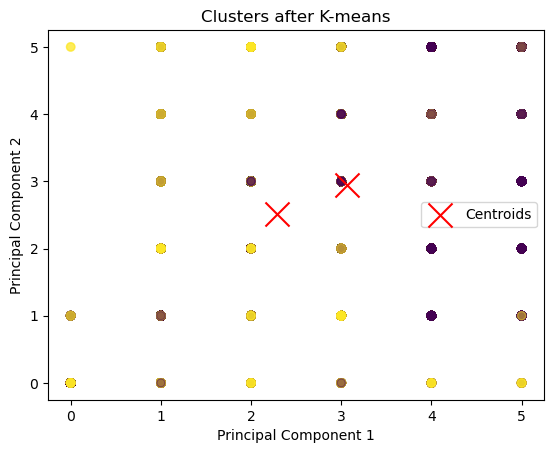

In [ ]:
import matplotlib.pyplot as plt
data_acp_values=data_acp.values
# Tracer les données dans l'espace de l'ACP avec des couleurs selon les clusters
plt.scatter(data_acp_values[:, 0], data_acp_values[:, 1], c=clusters_kmeans, cmap='viridis', marker='o', alpha=0.5)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='x', label='Centroids')
plt.title('Clusters after K-means')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


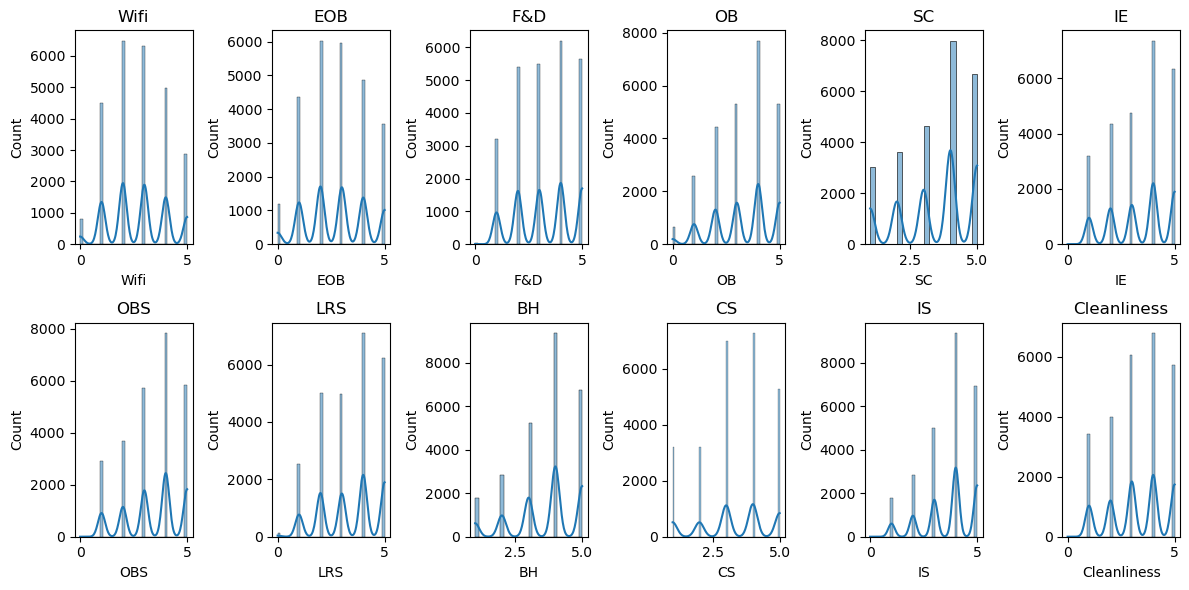

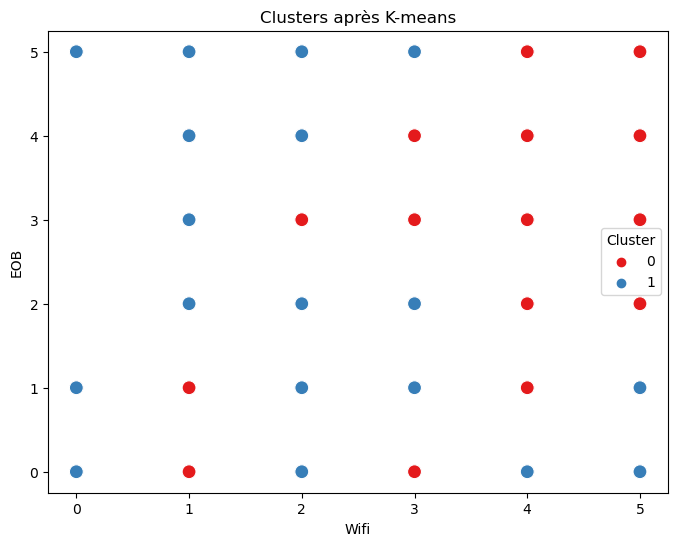

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution des données brutes
plt.figure(figsize=(12, 6))
for i, column in enumerate(data_acp.columns):
    plt.subplot(2, 6, i + 1)
    sns.histplot(data_acp[column], kde=True)
    plt.title(column)
plt.tight_layout()
plt.show()

# Visualisation des clusters après K-means
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Wifi', y='EOB', hue='Cluster', data=data, palette='Set1', s=100)
plt.title('Clusters après K-means')
plt.xlabel('Wifi')
plt.ylabel('EOB')
plt.legend(title='Cluster')
plt.show()


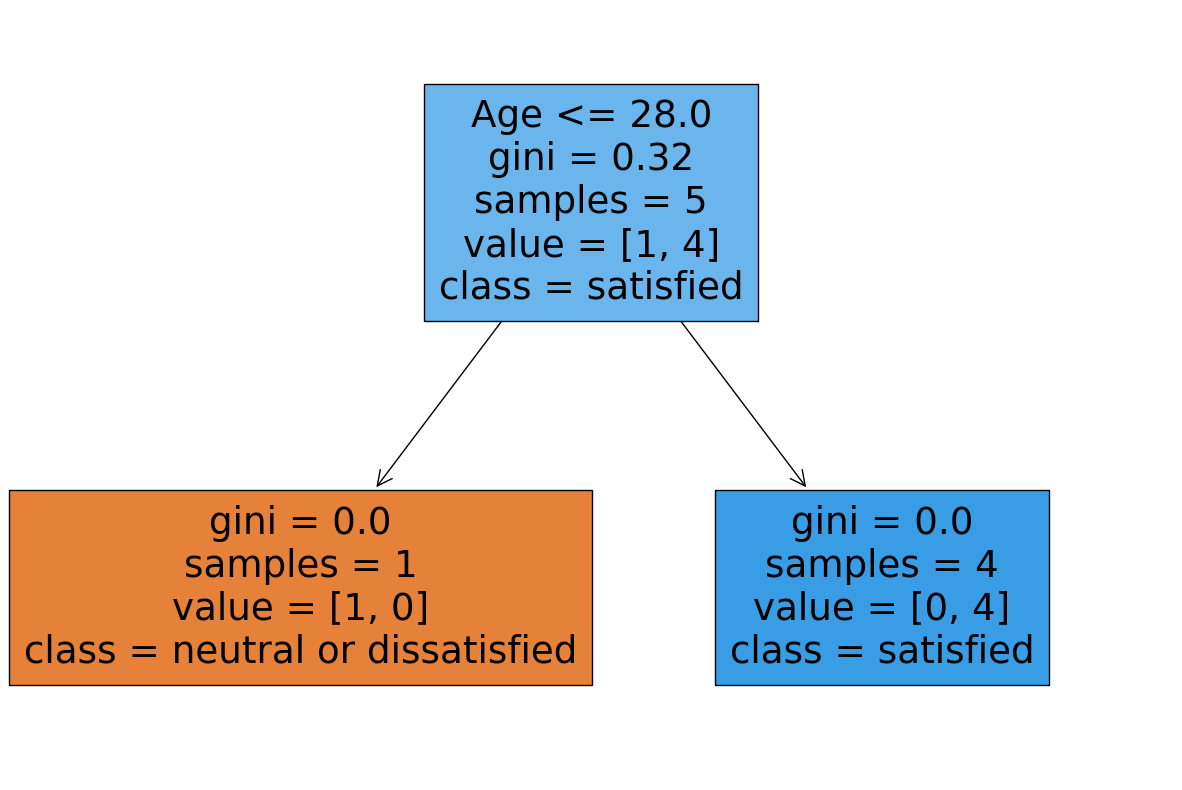

In [1]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
import pandas as pd

# Charger les données
data = pd.DataFrame({
    'Gender': ['Female', 'Female', 'Male', 'Male', 'Female'],
    'Customer Type': ['Loyal Customer', 'Loyal Customer', 'disloyal Customer', 'Loyal Customer', 'Loyal Customer'],
    'Age': [52, 36, 20, 44, 49],
    'Type of Travel': ['Business travel', 'Business travel', 'Business travel', 'Business travel', 'Business travel'],
    'Class': ['Eco', 'Business', 'Eco', 'Business', 'Eco'],
    'Flight Distance': [160, 2863, 192, 3377, 1182],
    'Inflight wifi service': [5, 1, 2, 0, 2],
    'Departure/Arrival time convenient': [4, 1, 0, 0, 3],
    'Ease of Online booking': [3, 3, 2, 0, 4],
    'Gate location': [4, 1, 4, 2, 3],
    # Ajoutez le reste de vos colonnes ici
    'satisfaction': ['satisfied', 'satisfied', 'neutral or dissatisfied', 'satisfied', 'satisfied']
})

# Convertir les variables catégorielles en variables numériques
data = pd.get_dummies(data, columns=['Gender', 'Customer Type', 'Type of Travel', 'Class'], drop_first=True)

# Séparer les données en caractéristiques (X) et la variable cible (y)
X = data.drop(columns=['satisfaction'])
y = data['satisfaction']

# Créer un classifieur d'arbre de décision
clf = DecisionTreeClassifier()

# Adapter le classifieur sur vos données
clf.fit(X, y)

# Tracer l'arbre de décision
plt.figure(figsize=(15, 10))  # Ajustez la taille selon vos préférences
plot_tree(clf, feature_names=X.columns, class_names=clf.classes_, filled=True)
plt.show()
